In [29]:
import pandas as pd

# Load the dataset
data_path = 'sfo_neighborhoods_census_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and a summary of the data
data_info = data.info()
data_head = data.head()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 397 non-null    int64  
 1   neighborhood         397 non-null    object 
 2   sale_price_sqr_foot  392 non-null    float64
 3   housing_units        397 non-null    int64  
 4   gross_rent           397 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.6+ KB


(   year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
 0  2010      Alamo Square           291.182945         372560        1239
 1  2010        Anza Vista           267.932583         372560        1239
 2  2010           Bayview           170.098665         372560        1239
 3  2010  Buena Vista Park           347.394919         372560        1239
 4  2010  Central Richmond           319.027623         372560        1239,
 None)

In [30]:
# Handling Missing Values: Fill missing values in 'sale_price_sqr_foot' with the median of the column
data['sale_price_sqr_foot'] = data['sale_price_sqr_foot'].fillna(data['sale_price_sqr_foot'].median())

# Removing Duplicates: Drop duplicate rows, if any
data_cleaned = data.drop_duplicates()

# Fixing Anomalies: Check for any negative values or extreme outliers in 'gross_rent' and 'sale_price_sqr_foot'
negative_values = data_cleaned[(data_cleaned['gross_rent'] < 0) | (data_cleaned['sale_price_sqr_foot'] < 0)]
extreme_values = data_cleaned[(data_cleaned['gross_rent'] > data_cleaned['gross_rent'].quantile(0.99)) |
                              (data_cleaned['sale_price_sqr_foot'] > data_cleaned['sale_price_sqr_foot'].quantile(0.99))]

# Output the cleaned data summary and checks for anomalies
cleaned_data_info = data_cleaned.info()
negative_values_count = negative_values.shape[0]
extreme_values_count = extreme_values.shape[0]

cleaned_data_info, negative_values_count, extreme_values_count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 397 non-null    int64  
 1   neighborhood         397 non-null    object 
 2   sale_price_sqr_foot  397 non-null    float64
 3   housing_units        397 non-null    int64  
 4   gross_rent           397 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 18.6+ KB


(None, 0, 4)

<ipython-input-31-cb1405b0ab1e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, ax=axes[0, 0], palette="viridis")


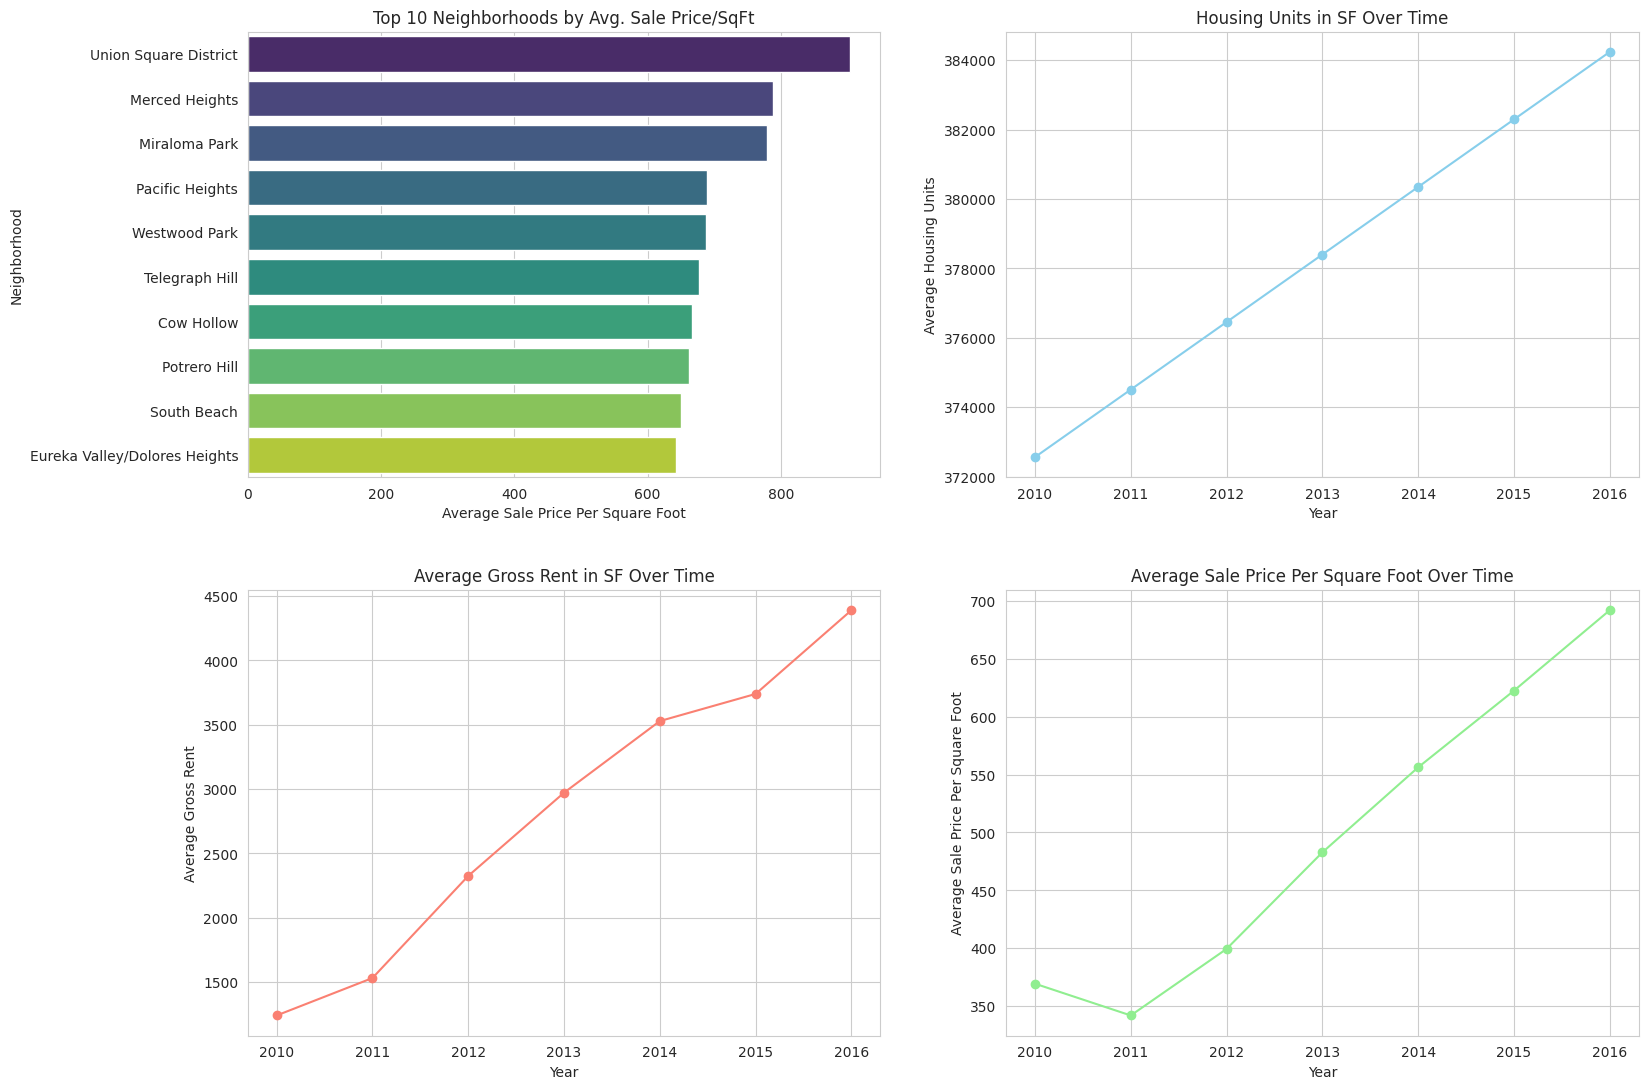

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Adjust the layout
plt.tight_layout(pad=6.0)

# Average Sale Price Per Square Foot by Neighborhood (Top 10)
top_neighborhoods = data.groupby('neighborhood').sale_price_sqr_foot.mean().nlargest(10)
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Top 10 Neighborhoods by Avg. Sale Price/SqFt')
axes[0, 0].set_xlabel('Average Sale Price Per Square Foot')
axes[0, 0].set_ylabel('Neighborhood')

# Housing Units Over Time
housing_units_by_year = data.groupby('year').housing_units.mean()
housing_units_by_year.plot(ax=axes[0, 1], color='skyblue', marker='o', linestyle='-')
axes[0, 1].set_title('Housing Units in SF Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Housing Units')

# Average Gross Rent Over Time
gross_rent_by_year = data.groupby('year').gross_rent.mean()
gross_rent_by_year.plot(ax=axes[1, 0], color='salmon', marker='o', linestyle='-')
axes[1, 0].set_title('Average Gross Rent in SF Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Gross Rent')

# Average Sale Price Per Square Foot Over Time
sale_price_by_year = data.groupby('year').sale_price_sqr_foot.mean()
sale_price_by_year.plot(ax=axes[1, 1], color='lightgreen', marker='o', linestyle='-')
axes[1, 1].set_title('Average Sale Price Per Square Foot Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Sale Price Per Square Foot')

plt.show()

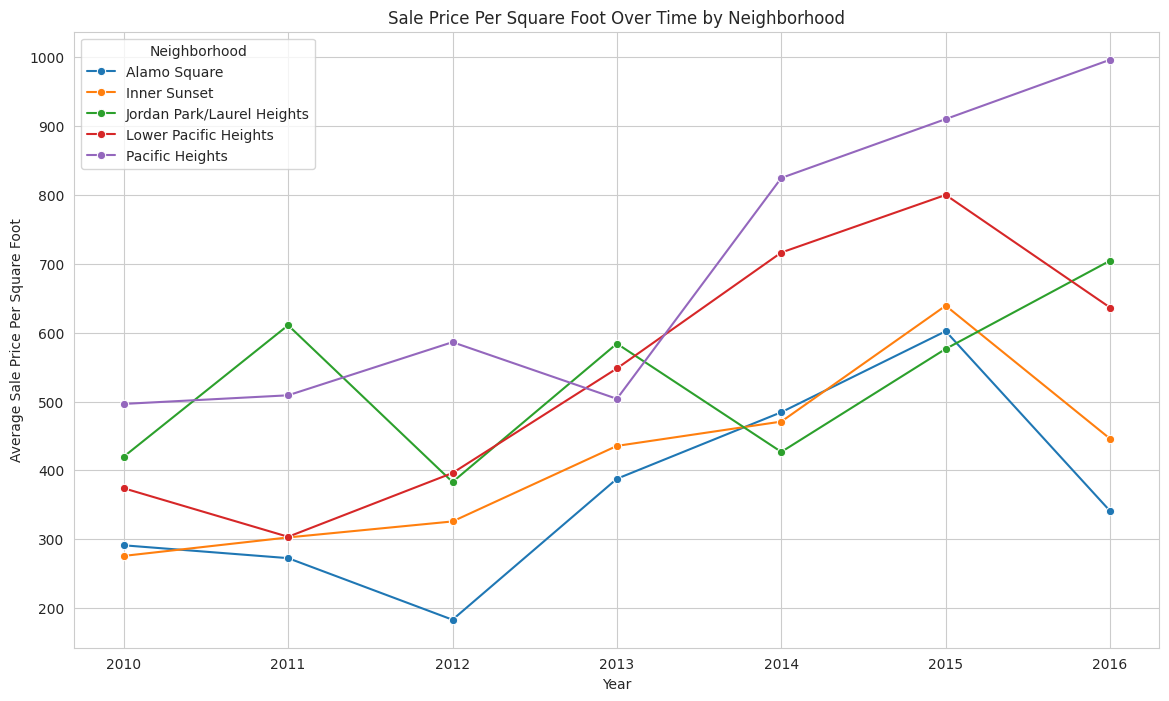

In [32]:
# Select a few neighborhoods based on their activity level in the dataset
selected_neighborhoods = data['neighborhood'].value_counts().nlargest(5).index.tolist()

# Filter the dataset for these neighborhoods
filtered_data = data[data['neighborhood'].isin(selected_neighborhoods)]

# Plotting
plt.figure(figsize=(14, 8))

# Using seaborn's lineplot to visualize the trends in sale price per square foot over the years for these neighborhoods
sns.lineplot(data=filtered_data, x='year', y='sale_price_sqr_foot', hue='neighborhood', marker='o')

plt.title('Sale Price Per Square Foot Over Time by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Average Sale Price Per Square Foot')
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

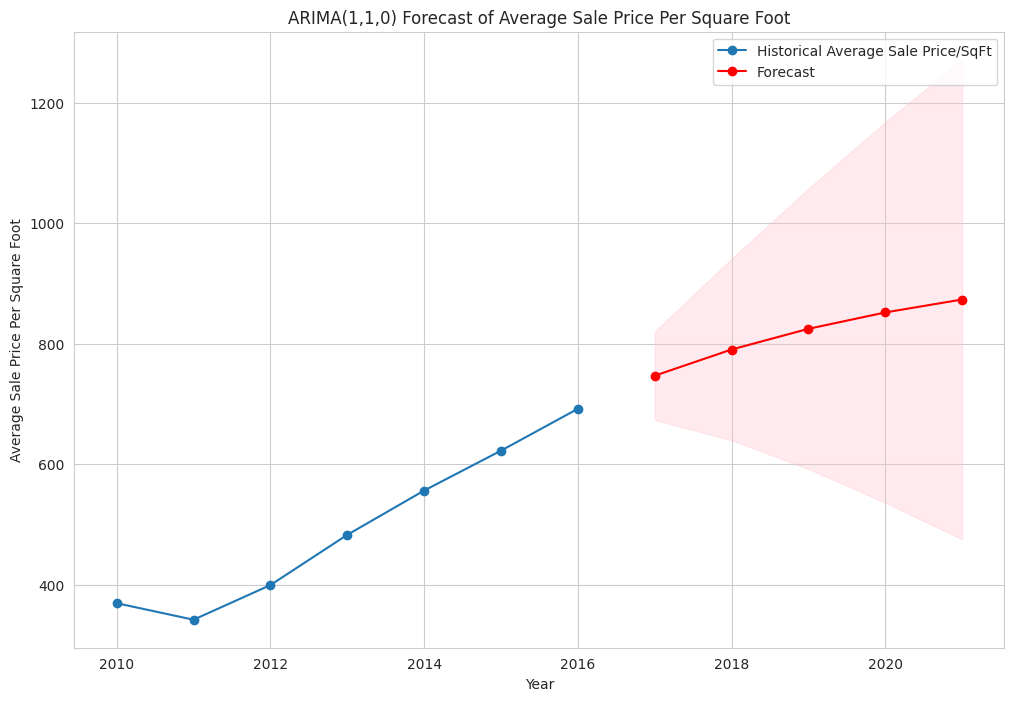

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     sale_price_sqr_foot   No. Observations:                    7
Model:                  ARIMA(1, 1, 0)   Log Likelihood                 -30.748
Date:                 Sun, 31 Mar 2024   AIC                             65.496
Time:                         06:44:00   BIC                             65.079
Sample:                              0   HQIC                            63.828
                                   - 7                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7907      0.385      2.053      0.040       0.036       1.546
sigma2      1402.1127    819.284      1.711      0.087    -203.654    3007.880
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.46   Prob(JB):                         0.75
Heteroskedasticity (H):               0.05   Skew:                             0.73
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Aggregate the data by year and calculate the mean sale price per square foot
yearly_data = data.groupby('year')['sale_price_sqr_foot'].mean()

# Fit an ARIMA(1,1,0) model to the data
model = ARIMA(yearly_data, order=(1, 1, 0))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Forecasting the next 5 years
forecast_years = 5
forecast = model_fit.get_forecast(steps=forecast_years)
forecast_index = list(range(yearly_data.index[-1] + 1, yearly_data.index[-1] + 1 + forecast_years))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the historical data along with the forecast and its confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(yearly_data.index, yearly_data, label='Historical Average Sale Price/SqFt', marker='o')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA(1,1,0) Forecast of Average Sale Price Per Square Foot')
plt.xlabel('Year')
plt.ylabel('Average Sale Price Per Square Foot')
plt.legend()
plt.show()

model_summary

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Encoding Categorical Variables
encoder = OneHotEncoder(sparse=False)
neighborhood_encoded = encoder.fit_transform(data_cleaned[['neighborhood']])

# Create a DataFrame for the encoded variables
neighborhood_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['neighborhood']))

# 2. Feature Selection and Engineering: For now, we'll use the existing features without creating new ones.
features_df = data_cleaned[['year', 'sale_price_sqr_foot', 'housing_units']]
features_df = features_df.reset_index(drop=True)  # Reset index to align with the neighborhood_df

# Concatenate the encoded neighborhood data with the other features
processed_features = pd.concat([features_df, neighborhood_df], axis=1)

# 3. Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(processed_features)

# 4. Data Splitting: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data_cleaned['gross_rent'], test_size=0.2, random_state=42)

# Output the shapes of the training and test sets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((317, 76), (80, 76), (317,), (80,))

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Predict the rent on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.0, 0.0, 1.0)

In [54]:
import numpy as np
from joblib import load

# Load the model
random_forest_loaded = load('random_forest_rent_predictor.joblib')

# Example new data for prediction
new_data = {
    'year': [2020],                    #input
    'neighborhood': ['Alamo Square'],  #input
    'sale_price_sqr_foot': [500],      #random for the moment
    'housing_units': [400000]          #random for the moment
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Encode 'neighborhood' using the same encoder used during training
encoded_neighborhood = encoder.transform(new_data_df[['neighborhood']])
neighborhood_df = pd.DataFrame(encoded_neighborhood, columns=encoder.get_feature_names_out(['neighborhood']))

# Prepare the features DataFrame
features_df = new_data_df[['year', 'sale_price_sqr_foot', 'housing_units']].reset_index(drop=True)

# Concatenate the encoded neighborhood data with the other features
processed_new_features = pd.concat([features_df, neighborhood_df], axis=1)

# Scale the features using the same scaler used during training
scaled_new_features = scaler.transform(processed_new_features)

# Predict the rent using the trained Random Forest model
predicted_rent = random_forest_loaded.predict(scaled_new_features)

predicted_rent[0]


4390.0

In [37]:
from joblib import dump

# Save the model
dump(random_forest, 'random_forest_rent_predictor.joblib')

['random_forest_rent_predictor.joblib']